# Outlines 
#### 1. Data cleaning 
#### 2. feature engineering 
#### 3. Getting more insights 
#### 4. Data Pre-processing
        ●	Fix Rating
        ●	Fix Size
        ●	Fix Price
        ●	Fix Category
        ●	Fix Android Version
        ●	Handle Missing Values
        ●	Outlier Detection and Handling
        ●	Fix anything need fixing 


In [393]:
#import library
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


In [394]:
#read to csv
data = pd.read_csv("googleplaystore.csv")

In [395]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [396]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [397]:
data.columns = data.columns.str.replace(" ","_")
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content_Rating', 'Genres', 'Last_Updated', 'Current_Ver',
       'Android_Ver'],
      dtype='object')

In [398]:
data.shape

(10841, 13)

In [399]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [400]:
data.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


# 2. Cleaning Data



## Rating

In [401]:
data['Rating'].unique()

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        nan,  4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,
        3. ,  1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,
        1.8,  2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

In [402]:
data[data['Rating']>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [403]:
data.loc[10472,"Category"]=float(data.loc[10472,"Category"])
data.loc[10472]= data.loc[10472].shift(1)
data.loc[10472]

App                                                  None
Category          Life Made WI-Fi Touchscreen Photo Frame
Rating                                                1.9
Reviews                                              19.0
Size                                                 3.0M
Installs                                           1,000+
Type                                                 Free
Price                                                   0
Content_Rating                                   Everyone
Genres                                                NaN
Last_Updated                            February 11, 2018
Current_Ver                                        1.0.19
Android_Ver                                    4.0 and up
Name: 10472, dtype: object

In [404]:
data.loc[10472,"App"]=data.loc[10472,"Category"]
data.loc[10472,"Category"]=np.nan
data.loc[10472]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              NaN
Rating                                                1.9
Reviews                                              19.0
Size                                                 3.0M
Installs                                           1,000+
Type                                                 Free
Price                                                   0
Content_Rating                                   Everyone
Genres                                                NaN
Last_Updated                            February 11, 2018
Current_Ver                                        1.0.19
Android_Ver                                    4.0 and up
Name: 10472, dtype: object

## Size 

In [405]:
data['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [406]:
data['Size'] = data.Size.replace("Varies with device",np.nan)
data['Size'] = data.Size.str.replace("M","000")
data['Size'] = data.Size.str.replace("k","")
data['Size'] = data.Size.str.replace('.','')
data['Size'] = data['Size'].astype('float')
data['Size'].dtype

dtype('float64')


## Price


In [407]:
data['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [408]:
data['Price'] = data.Price.str.replace("$","")
data['Price'] = pd.to_numeric(data['Price'], errors='coerce')

In [409]:
data['Price'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

<a id="e"></a>
## Category

In [410]:
data['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION', nan],
      dtype=object)

## Android Version & Current Ver

In [411]:
data['Android_Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

In [412]:
l1 = ['Android_Ver','Current_Ver']
for i in l1 : 
    data[i] = data[i].replace("Varies with device",np.nan)
    data[i] = data[i].str.replace(" and up", "")
    data[i] = data[i].str.extract(r'(\d+\.\d+)')
    data[i] = data[i].astype('float')
data['Android_Ver'].dtype


dtype('float64')

In [413]:
data['Current_Ver'].dtype

dtype('float64')

## Installs

In [414]:
data['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [415]:
data['Installs'] = data.Installs.str.replace('+','')
data['Installs'] = data.Installs.str.replace(',','')
data['Installs'] = data.Installs.astype('float')
data['Installs'].dtype

dtype('float64')

## Type

In [416]:
data['Type'].unique()

array(['Free', 'Paid', nan], dtype=object)

## Content Rating

In [417]:
data['Content_Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

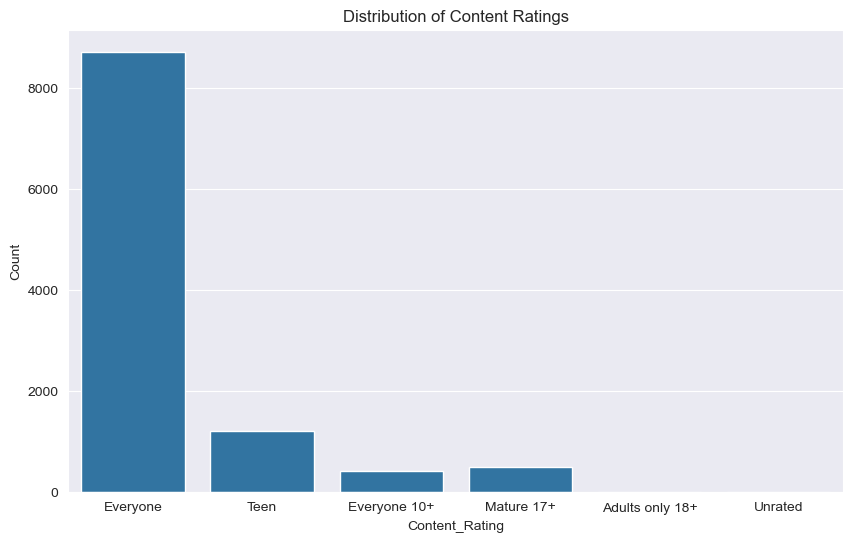

In [418]:
# Plot the distribution of content ratings
plt.figure(figsize=(10,  6))
sns.countplot(x='Content_Rating', data=data)
plt.title('Distribution of Content Ratings')
plt.xlabel('Content_Rating')
plt.ylabel('Count')
plt.show()

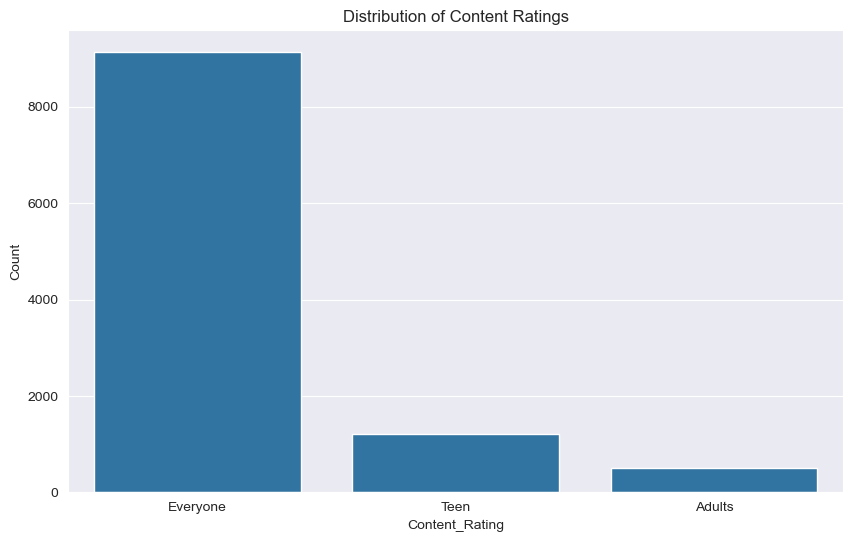

In [419]:
data['Content_Rating'] = data.Content_Rating.replace("Everyone 10+", 'Everyone')
data['Content_Rating'] = data.Content_Rating.replace("Mature 17+", 'Adults')
data['Content_Rating'] = data.Content_Rating.replace("Adults only 18+", 'Adults')
data['Content_Rating'] = data.Content_Rating.replace("Unrated", np.nan)
# Plot the distribution of content ratings
plt.figure(figsize=(10,  6))
sns.countplot(x='Content_Rating', data=data)
plt.title('Distribution of Content Ratings')
plt.xlabel('Content_Rating')
plt.ylabel('Count')
plt.show()


## Genres

In [420]:
data['Genres'].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

In [421]:
data[data['Genres'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,NaN,1.9,19.0,30000.0,1000.0,Free,0.0,Everyone,NaN,"February 11, 2018",1.0,4.0


In [422]:
data['Genres'] = data['Genres'].fillna(data['Genres'].mode()[0])
data.loc[10472]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              NaN
Rating                                                1.9
Reviews                                              19.0
Size                                              30000.0
Installs                                           1000.0
Type                                                 Free
Price                                                 0.0
Content_Rating                                   Everyone
Genres                                              Tools
Last_Updated                            February 11, 2018
Current_Ver                                           1.0
Android_Ver                                           4.0
Name: 10472, dtype: object

## Last Update

In [423]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            9146 non-null   float64
 5   Installs        10841 non-null  float64
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  float64
 8   Content_Rating  10839 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last_Updated    10841 non-null  object 
 11  Current_Ver     9175 non-null   float64
 12  Android_Ver     9477 non-null   float64
dtypes: float64(6), object(7)
memory usage: 1.1+ MB


In [424]:
data['Last_Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

In [425]:
data['Last_Updated'] = pd.to_datetime(data['Last_Updated']).dt.date

## Handling missing Data

In [426]:
data.isnull().sum()

App                  0
Category             1
Rating            1474
Reviews              0
Size              1695
Installs             0
Type                 1
Price                0
Content_Rating       2
Genres               0
Last_Updated         0
Current_Ver       1666
Android_Ver       1364
dtype: int64

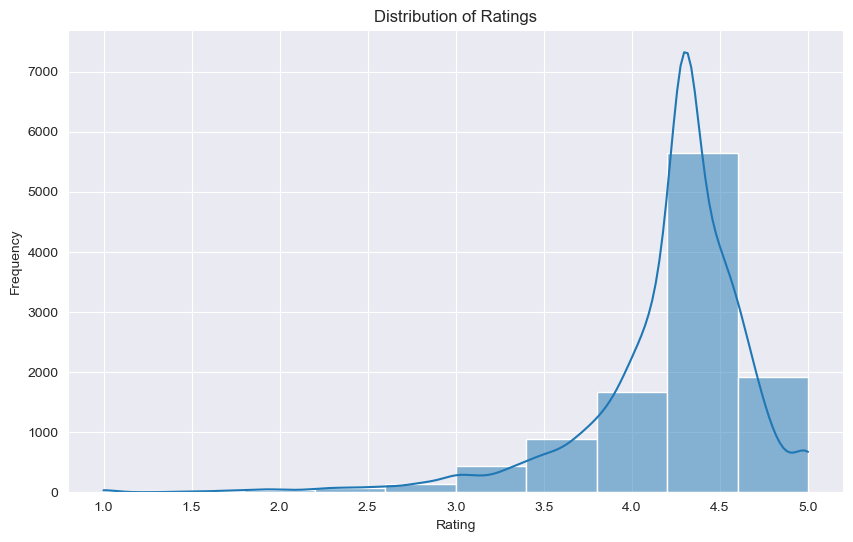

In [427]:
# Rating replace nans with median
data['Rating'] = data['Rating'].fillna(data['Rating'].median())


# Create the histogram of ratings
plt.figure(figsize=(10, 6))
sns.histplot(data['Rating'], bins=10, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


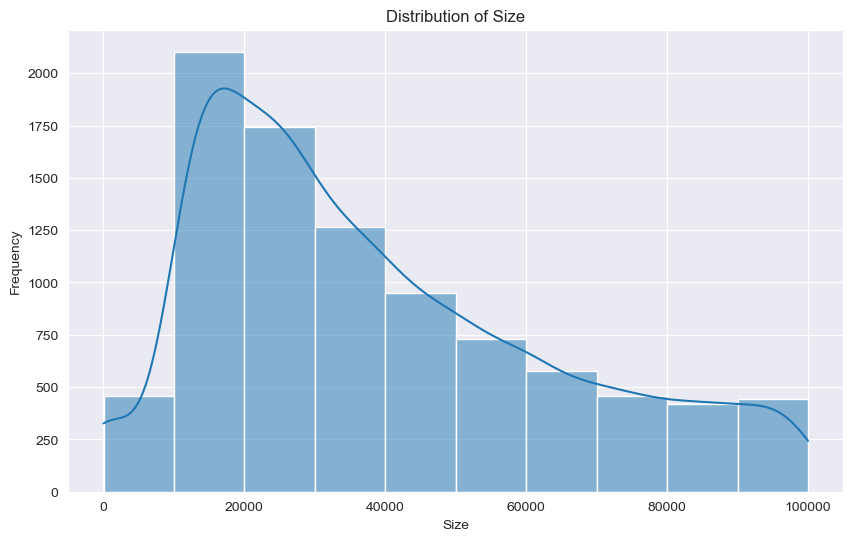

In [428]:
# Size replace nans with mode
data['Size'] = data['Size'].fillna(data['Size'].mode())

# Create the histogram of ratings
plt.figure(figsize=(10, 6))
sns.histplot(data['Size'], bins=10, kde=True)
plt.title('Distribution of Size')
plt.xlabel('Size')
plt.ylabel('Frequency')
plt.show()


In [429]:
# delete other nans because it will not affect data 
data.dropna(inplace=True)
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content_Rating    0
Genres            0
Last_Updated      0
Current_Ver       0
Android_Ver       0
dtype: int64

## Review


In [430]:
data['Reviews'].unique()

array(['159', '967', '87510', ..., '885', '603', '1195'], dtype=object)

In [431]:
data['Reviews'] = pd.to_numeric(data['Reviews'], errors='coerce')

## 1.	What is the most expensive app on the Play Store?

In [432]:
data.nlargest(1,'Price')

App_name = data.loc[4367,'App']
App_name

"I'm Rich - Trump Edition"

## 2.	Which genre has the highest number of apps?

In [433]:
x = data.Genres.value_counts()
x.nlargest(1)


Genres
Tools    718
Name: count, dtype: int64

## 3.	What is the average size of free vs. paid apps?

In [434]:
free = data[data['Type']=='Free'].Size
paid = data[data['Type']=='Paid'].Size
avg_free = free.sum()/len(free)
avg_paid = paid.sum()/len(paid)
print(f"average free {avg_free} vs average paid {avg_paid}")


average free 39228.47953431372 vs average paid 35622.59397417503


## 4.	What are the top 5 most expensive apps with a perfect rating (5)?

In [435]:
five_stars = data[data['Rating']==5].nlargest(5,'Price')
five_stars

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
5489,AP Art History Flashcards,FAMILY,5.0,1,96000.0,10.0,Paid,29.99,Adults,Education,2016-01-19,3.30,4.0
7477,USMLE Step 2 CK Flashcards,FAMILY,5.0,1,40000.0,10.0,Paid,19.99,Everyone,Education,2014-05-26,2.47,2.2
5246,Hey AJ! It's Bedtime!,FAMILY,5.0,1,63000.0,10.0,Paid,4.99,Everyone,Education,2018-04-04,1.00,2.3
5482,meStudying: AP English Lit,FAMILY,5.0,1,655.0,10.0,Paid,4.99,Everyone,Education,2013-08-31,1.30,2.0
7204,TI-84 CE Graphing Calculator Manual TI 84,FAMILY,5.0,1,27000.0,100.0,Paid,4.99,Everyone,Education,2018-03-28,1.50,4.1


## 5.	How many apps have received more than 50K reviews?

In [436]:
apps_with50k = data[data['Reviews'] > 50000]
apps_with50k

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,87000.0,5000000.0,Free,0.0,Everyone,Art & Design,2018-08-01,1.20,4.0
18,FlipaClip - Cartoon animation,ART_AND_DESIGN,4.3,194216,39000.0,5000000.0,Free,0.0,Everyone,Art & Design,2018-08-03,2.20,4.0
19,ibis Paint X,ART_AND_DESIGN,4.6,224399,31000.0,10000000.0,Free,0.0,Everyone,Art & Design,2018-07-30,5.50,4.1
45,"Canva: Poster, banner, card maker & graphic de...",ART_AND_DESIGN,4.7,174531,24000.0,10000000.0,Free,0.0,Everyone,Art & Design,2018-07-31,1.60,4.1
69,Used cars for sale - Trovit,AUTO_AND_VEHICLES,4.2,52530,70000.0,5000000.0,Free,0.0,Everyone,Auto & Vehicles,2018-07-16,4.47,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10781,Modern Strike Online,GAME,4.3,834117,44000.0,10000000.0,Free,0.0,Teen,Action,2018-07-30,1.25,4.1
10784,Big Hunter,GAME,4.3,245455,84000.0,10000000.0,Free,0.0,Everyone,Action,2018-05-31,2.80,4.0
10796,Inf VPN - Global Proxy & Unlimited Free WIFI VPN,TOOLS,4.7,61445,78000.0,1000000.0,Free,0.0,Everyone,Tools,2018-07-26,1.90,4.1
10803,Fatal Raid - No.1 Mobile FPS,GAME,4.3,56496,81000.0,1000000.0,Free,0.0,Teen,Action,2018-08-07,1.50,4.0


## 6.	What is the average price of apps, grouped by genre and number of installs?

In [442]:
x=data.groupby(['Installs','Genres'])
x.Price.mean()

Installs      Genres          
0.000000e+00  Art & Design          0.00
              Business              0.00
              Education             2.49
              Finance             212.99
              Medical             200.00
                                   ...  
5.000000e+08  Communication         0.00
              Health & Fitness      0.00
              Tools                 0.00
1.000000e+09  Arcade                0.00
              News & Magazines      0.00
Name: Price, Length: 860, dtype: float64

## 7.	How many apps have a rating higher than 4.7, and what is their average price?

In [444]:
data[data['Rating']>4.7].Price.mean()

0.4875774134790528

## 8.	What is Google's estimated revenue from apps with 5,000,000+ installs?
(Assuming Google takes a 30% cut from app sales)
